In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
class DeGrootModel:
    def __init__(self, graph, initial_opinions):
        self.graph = graph
        self.num_agents = len(graph.nodes())
        self.opinions = np.array(initial_opinions, dtype=float)
        self.history = [self.opinions.copy()]
        
    def step(self):
        new_opinions = np.zeros(self.num_agents)
        for agent in self.graph.nodes():
            neighbors = list(self.graph.neighbors(agent))
            if neighbors:
                total_opinion = self.opinions[agent] + sum(self.opinions[n] for n in neighbors)
                new_opinions[agent] = total_opinion / (len(neighbors) + 1)
            else:
                new_opinions[agent] = self.opinions[agent]
        self.opinions = new_opinions
        self.history.append(self.opinions.copy())
    
    def run(self, max_steps=100, tol=1e-5):
        for step in range(max_steps):
            prev_opinions = self.opinions.copy()
            self.step()
            change = np.abs(self.opinions - prev_opinions).mean()
            if change < tol:
                print(f"Сходимость достигнута на шаге {step + 1}")
                break
        return np.array(self.history)

Сходимость достигнута на шаге 21


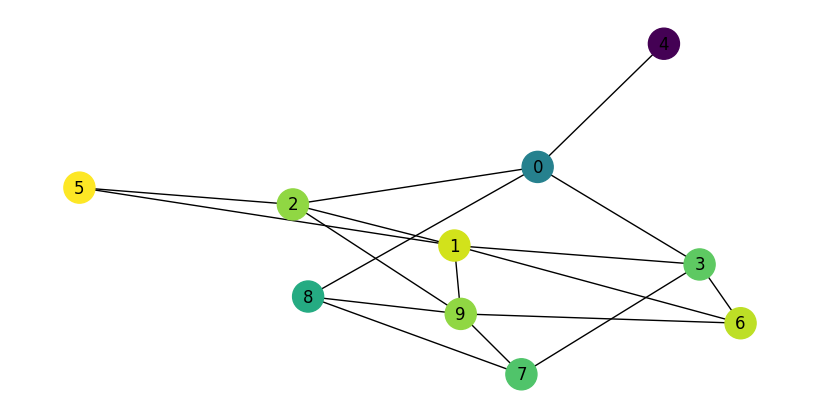

In [15]:
G = nx.erdos_renyi_graph(n=10, p=0.3, seed=42)
initial_opinions = np.random.uniform(0, 1, size=len(G.nodes()))
    
model = DeGrootModel(G, initial_opinions)
history = model.run(max_steps=50)
    
plt.figure(figsize=(8, 4))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_color=model.opinions, 
            node_size=500, with_labels=True)    

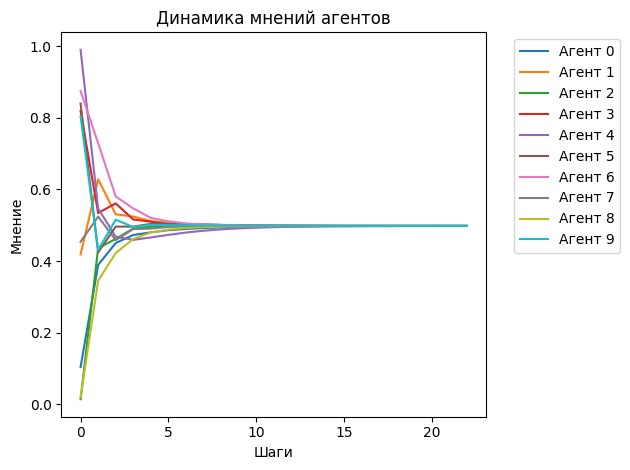

In [14]:
for agent in range(history.shape[1]):
    plt.plot(history[:, agent], label=f'Агент {agent}')
    plt.xlabel('Шаги')
    plt.ylabel('Мнение')
    plt.title('Динамика мнений агентов')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
plt.show()